In [853]:
import matplotlib.pyplot as plt
import numpy as np

# Домашнее задание №3

Исходные данные

In [854]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

**Задача 1*.**Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

Реализуем функцию сигмоиды
$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [855]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Реализуем функцию потерь log loss
$$logloss(A,y) = - \sum^{l}_{i=1} (y_{i} \text{ln}A_i + (1 - y_{i})\text{ln} (1-A_i)),$$
 
где $A_i=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

В векторной форме:

$$logloss(A,y) = - ((y, ln(A)) - ((1 - y), ln(1-A)))$$

где $A=\frac{1}{1 + exp(-(w,X))}.$

In [856]:
def calc_logloss(y, y_pred):
    err = -np.mean(y*np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    #в векторной форме
    # err = - (y @ np.log(y_pred) + (1.0 - y) @ np.log(1.0 - y_pred)) / y.shape[0] 
    return err

Получаем ошибку из-за того, что выражение, стоящее под знаком логарифма, обращается в 0.

In [857]:
w = np.array([1, 3, 2, 1])
z = np.dot(w,X)
y_pred = sigmoid(z)
calc_logloss(y, y_pred)

<ipython-input-856-50d025b792bc>:2: RuntimeWarning: divide by zero encountered in log
  err = -np.mean(y*np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-856-50d025b792bc>:2: RuntimeWarning: invalid value encountered in multiply
  err = -np.mean(y*np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


nan

Исправим функцию ошибок, преобразовав выражения с логарифмом:
$$ln(A) = ln(\frac{1}{1 + exp(-(w,X))}) =$$
$$ln(1) - ln(1 + exp(-(w,X))) = - ln(1 + exp(-(w,X))),$$

$$ln(1 - A) = ln(\frac{exp(-(w,X))}{1 + exp(-(w,X)))} = $$
$$ln(exp(-(w,X))) - ln(1 + exp(-(w,X))) = -(w,X) - ln(1 + exp(-(w,X))).$$
    

In [858]:
def logloss(w, X, y):
    z = np.dot(w,X)
    a1 = - np.log(1 + np.exp(-z)) # ln(A)
    a2 = - z + a1 # ln(1 - A)
    err = (-np.dot(y,a1) - np.dot((1 - y), a2))/y.shape[0]
    #err = - np.mean(y * a1 + (1.0 - y) * a2)
    return err

In [859]:
w = np.array([1, 3, 2, 1])
z = np.dot(w,X)
y_pred = sigmoid(z)
calc_logloss(y, y_pred), logloss(w, X, y)

<ipython-input-856-50d025b792bc>:2: RuntimeWarning: divide by zero encountered in log
  err = -np.mean(y*np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-856-50d025b792bc>:2: RuntimeWarning: invalid value encountered in multiply
  err = -np.mean(y*np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


(nan, 925.1)

Функция logloss находит значения, в то время как calc_logloss выдает ошибку.

**Задача 2.** Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Реализуем градиентный спуск

$$w_{n+1} = w_{n} - \alpha(\nabla(logloss(A,y))) = $$

$$w_{n} - \alpha(\frac{1}{l}(A-y)X^{T}),$$

где $A=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

In [860]:
def eval_model(X,y,iterations,alpha):
    losses = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W,X)
        y_pred = sigmoid(z)
        err = logloss(W,X,y)
        losses.append(err)
        W = W - alpha * (1/n * np.dot((y_pred - y),X.T))
    plt.plot(losses)
    plt.title('Losses')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
    return W

При фиксированном количестве итераций уменьшение $\alpha$ приводит к уменьшению logloss. оптимальное значение $\alpha$ = 1e-6.

Определим оптимальное количество итераций при $\alpha$ = 1e-6.

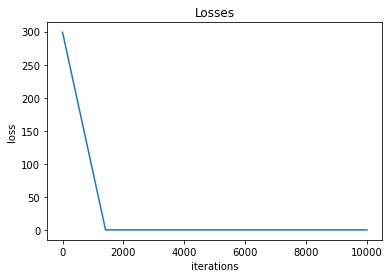

array([ 0.49530381, -0.1395695 , -0.00243201,  1.52244284])

In [861]:
W_model = eval_model(X, y, 10000, 1e-6)
W_model

**Вывод:** Оптимальное количество итераций 1500, оптимальное значение скорости обучения 1e-6.

**Задача 3**. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

Создадим функцию для выполнения предсказаний. Вероятность отнесения объекта к классу 1 равна
$$P(y=1|x) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$$

In [862]:
def calc_pred_proba(w, X):
    z = np.dot(w,X)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

Применение функции calc_pred_proba на векторе весов, посчитанном eval_model.

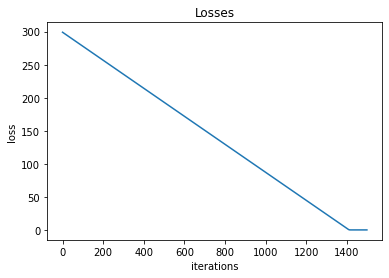

Предсказанная вероятность класса 1:
 [0.65988298 0.54406104 0.80801024 0.60342047 0.40030123 0.5184327
 0.67175274 0.23155762 0.68660404 0.69625868]


In [863]:
W = eval_model(X, y, 1500, 1e-6)
print(f'Предсказанная вероятность класса 1:\n {calc_pred_proba(W, X)}')

**Задача 4.** Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [864]:
def calc_pred(w, X):
    y_pred_proba = calc_pred_proba(w, X)
    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(len(y_pred_proba)):
        if (y_pred_proba[i] > 0.5): 
            y_pred[i] = 1
        elif (y_pred_proba[i] <= 0.5):
            y_pred[i] = 0
    return y_pred

Применение функции calc_pred_proba на векторе весов, посчитанном eval_model.

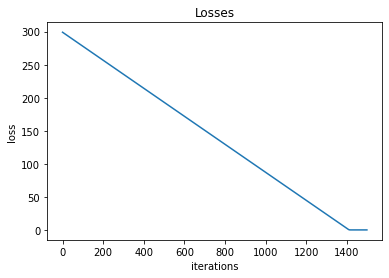

Предсказанные классы:
 [1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [865]:
W = eval_model(X, y, 1500, 1e-6)
print(f'Предсказанные классы:\n {calc_pred(W, X)}')

**Задача 5** Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [866]:
from sklearn.metrics import f1_score, precision_score, recall_score, \
                            classification_report, confusion_matrix, \
                            accuracy_score, f1_score

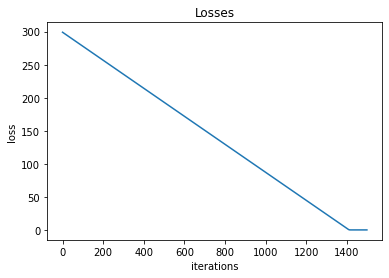

In [867]:
W = eval_model(X, y, 1500, 1e-6)
y_pred = calc_pred(W, X)

Вычислим accuracy -- доля правильных ответов.
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}] = \frac{5}{10} = \frac{1}{2} = 0.5.$$

In [868]:
y, y_pred

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1.]))

In [869]:
print(f'Значение accuracy {accuracy_score(y,y_pred)}')

Значение accuracy 0.5


Найдем матрицу ошибок (предсказания по столбцам, истинные значения по строкам)

In [870]:
print(confusion_matrix(y, y_pred))

[[1 4]
 [1 4]]


Из матрицы ошибок получам: TP = 4, FP = 4, TN = 1, FN = 1.

Вычислим precision -- доля истинных срабатываний от общего количества срабатываний (показывает насколько можно доверять алгоритму классификации в случае срабатывания)
$$precision = \frac{TP}{TP \: + \: FP} = \frac{4}{4 \: + \: 4} = \frac{1}{2} = 0.5.$$

In [871]:
print(f'Значение precision {precision_score(y,y_pred)}')

Значение precision 0.5


Вычислим recall -- доля объектов, истинно относящихся к классу "1", которые алгоритм отнес к этому классу.
$$recall = \frac{TP}{TP \: + \: FN} = \frac{4}{4 + 1} = \frac{4}{5} = 0.8$$

In [872]:
print(f'Значение recall {recall_score(y,y_pred)}')

Значение recall 0.8


Вычислим f1-меру -- среднее гармоническое между точностью и полнотой

$$F_1 = \frac{2 \cdot precision \cdot recall }{ presision + recall} = \frac{2\cdot 0.8 \cdot 0.5}{0.5 + 0.8} = \frac{4}{5} : \frac{13}{10} = \frac{8}{13} \sim 0.615.$$

In [873]:
print(f'Значение f1-score {f1_score(y,y_pred)}')

Значение f1-score 0.6153846153846154


Подсчет всех метрик сразу:

In [874]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10



**Задача 6.** Могла ли модель переобучиться? Почему?

Модель логистической регрессии имеет мало параметров, а значит и малые шансы на переобучение.  

**Задача 7 *.** Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

**Реализуем $L_1$-регуляризацию.** Добавим штраф к функции потерь:
$$logloss(A,y) = - \sum^{l}_{i=1} (y_{i} \text{ln}A_i + (1 - y_{i})\text{ln} (1-A_i)) + \lambda||w||_{1},$$
 
где $A_i=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

Тогда $k$-ый шаг градиентного спуска вычисляется по формуле:

$$w^{k} = w^{k-1} - \alpha(\nabla(logloss(A,y) + \lambda ||w||_{1})) = $$


$$w^{k-1} - \alpha(\frac{1}{l}(A-y)X^{T} + \lambda sign(w)).$$

In [875]:
def eval_model_l1(X,y,iterations,alpha,lamb):
    losses = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W,X)
        y_pred = sigmoid(z)
        err = logloss(W,X,y) #считаем функцию потерь
        losses.append(err)
        W = W - alpha * (1/n * np.dot((y_pred - y),X.T) + lamb * np.sign(w))
    
    plt.plot(losses)
    plt.title('Losses L_1')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
    return W

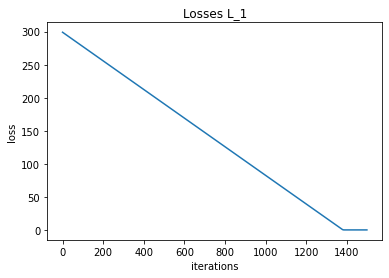

array([ 0.48101422, -0.15505149, -0.00238886,  1.50706918])

In [876]:
W_l1 = eval_model_l1(X, y, 1500, 1e-6, 10)
W_l1

In [877]:
y_pred_l1 = calc_pred(W_l1, X)
print(classification_report(y, y_pred_l1))

              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10



Меняя значение коэффициента регуляризации, можно снизить оптимальное число итераций при заданной скорости обучения.
Изменение коэффициента регуляризации приводит к изменению показателей метрик. 

**Реализуем $L_2$-регуляризацию.** Добавим штраф к функции потерь:
$$logloss(A,y) = - \sum^{l}_{i=1} (y_{i} \text{ln}A_i + (1 - y_{i})\text{ln} (1-A_i)) + \lambda||w||_{2}^{2},$$
 
где $A_i=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

Тогда $k$-ый шаг градиентного спуска вычисляется по формуле:

$$w^{k} = w^{k-1} - \alpha(\nabla(logloss(A,y) + \lambda ||w||_{2}^{2})) = $$


$$w^{k-1} - \alpha(\frac{1}{l}(A-y)X^{T} + \lambda w).$$

In [878]:
def eval_model_l2(X,y,iterations,alpha,lamb):
    losses = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W,X)
        y_pred = sigmoid(z)
        err = logloss(W,X,y) #считаем функцию потерь
        losses.append(err)
        W = W - alpha * (1/n*np.dot((y_pred - y),X.T) + lamb * w)
    
    plt.plot(losses)
    plt.title('Losses L_2')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
    return W

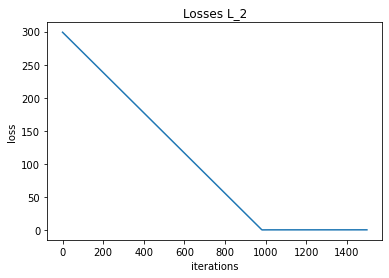

array([ 0.34626743, -0.58918755, -0.00190768,  1.37255152])

In [879]:
W_l2 = eval_model_l2(X, y, 1500, 1e-6, 100)
W_l2

In [880]:
y_pred_l2 = calc_pred(W_l2, X)
print(classification_report(y, y_pred_l2))

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60         5
         1.0       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



Меняя значение коэффициента регуляризации, можно снизить оптимальное число итераций при заданной скорости обучения.
Изменение коэффициента регуляризации приводит к изменению показателей метрик. 